# Car Accident Severity
### Capstone Project
### Sumeet Grewal

## Introduction

One of the most dangerous and complex activities we engage in on a daily basis is driving a vehicle. Increasing population density in major cities such as Seattle increases the propensity for traffic incidents and collisions. According to a dataset on collisions in the city of Seattle, there have been over 190 000 incidents since 2004. Traffic collisions have an enormous impact, most notably in terms of physical injury and in property damage. 

The key audience is the City of Seattle as they would ideally undertake initiatives to reduce the number and severity of traffic collisions. From a mitigation perspective, it would be unwise to apply resources uniformly across the city in order to address a specific issue. Mitigation efforts should be concentrated where they would have the greatest impact. 

It would thus be constructive to identify which intersections are the most dangerous. This way, the City of Seattle can optimally allocate their resources and mitigation tactics towards addressing key factors in key intersections.

It is also possible that certain environmental factors and driver behaviours increase the severity of collisions. Some of these conditions could be specific days and times, weather and road conditions, driver inattention, and speeding. 

The objective of this project is to understand which factors have the greatest impact on the severity of collisions in intersections, and identify which intersections could most benefit from mitigation tactics.


## Dataset

I will be using the provided dataset of all collisions provided by the Seattle Police Department (SPD) from 2004 - Present. 
The selected dataset contains all collisions provided by the Seattle Police Department (SPD) from 2004 - Present. It contains over 194000 records and 37 fields which are described in detail in the associated metadata file. The objective is to develop a model to accurately predict the ‘severitycode’ label. This field currently either contains a value of ‘1’ indicating property damage only or a value of ‘2’ indicating physical injury from the collision. 

There are many columns that describe the various details of the collision. The focus of this study will be on identifying the key contributors to the collision. Some of the fields that will be assessed for their impact on severity are: 


|     ATTRIBUTE         |     DATA TYPE     |     DESCRIPTION                                                                 |
|-----------------------|-------------------|---------------------------------------------------------------------------------|
|     INCDTTM           |     Text          |     Incident Date and Time                                                      |
|     WEATHER           |     Text          |     The weather conditions at the time of the collision                         |
|     ROADCOND          |     Text          |     The conditions of the road at the time of the collision                     |
|     LIGHTCOND         |     Text          |     The light conditions at the time of the collision                           |
|     INATTENTIONIND    |     Text (Y/N)    |     Whether or not the collision was due to inattention by the driver           |
|     SPEEDING          |     Text (Y/N)    |     Whether or not the collision was due to speeding by the driver              |
|     PEDROWNOTGRNT     |     Text (Y/N)    |     Whether or not the pedestrian right of way was not granted by the driver    |
|     UNDERINFL         |     Text (Y/N)    |     Whether or not the driver was under the influence of drugs or alcohol       |


Once the data has been prepared, the model will be trained on this data to predict the severity. This will help to identify which factors are most significant in the severity of a collision. As the objective is to determine the class label of a categorical target attribute, a classification model is most appropriate. As the data is binary and we are looking to understand the impact of various features, a Logistic Regression model is likely the best choice. Other models such as Support Vector Machine and Decision Trees may also be evaluated for their accuracy. 


## Exploratory Data Analysis

### Load the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")
sns.set_palette("Blues_r")
sns.despine()
plt.style.use('seaborn-darkgrid')
%matplotlib inline 

In [3]:
# Import the Dataset

url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(url)

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

### Data Preparation and Cleaning

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

There are a number of columns that are used to describe the outcome and severity of the collision. The column 'SEVERITYCODE' is the only column that will be used to measure the severity so the other columns can be dropped. These include 'PEDCOUNT', 'PERSONCOUNT', 'INJURIES', and so on.
The column 'SEVERITYDESC' is redundant information to 'SEVERITYCODE' so it can also be removed. 

In [7]:
df.drop(labels=['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT'], axis=1, inplace=True)
df.drop(labels=['SEVERITYDESC'], axis=1, inplace=True)

Several of the attributes are primarily for identification and tracking purposes so they won't be useful for the model and can be dropped as well

In [8]:
df.drop(labels=['INCKEY', 'COLDETKEY', 'LOCATION', 'EXCEPTRSNCODE', 'LOCATION','EXCEPTRSNDESC', 'ST_COLCODE', 'ST_COLDESC', 'OBJECTID', 'INCDATE', 'JUNCTIONTYPE', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'X', 'Y', 'REPORTNO', 'STATUS', 'SEVERITYCODE.1', 'INCDTTM', 'SDOTCOLNUM', 'SDOT_COLCODE', 'SDOT_COLDESC'], axis=1, inplace=True)

In [9]:
df.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'INTKEY', 'COLLISIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING'],
      dtype='object')

In [10]:
# Examine value counts for each of the remaining fields

for attribute in df.columns: 
    print(df[attribute].value_counts())
    print(df[attribute].isnull().value_counts())
    print()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
False    194673
Name: SEVERITYCODE, dtype: int64

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

29973.0    252
29933.0    160
29913.0    138
29549.0    136
33512.0    128
          ... 
36825.0      1
26604.0      1
26603.0      1
36816.0      1
27793.0      1
Name: INTKEY, Length: 7614, dtype: int64
True     129603
False     65070
Name: INTKEY, dtype: int64

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

Y    29805
Name: INATTENTIONIND, dtype: int64
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

N    100274
0     80394
Y      5126
1      3995
Name

Text(0.5, 1.0, 'Number of Collisions by Collision Type')

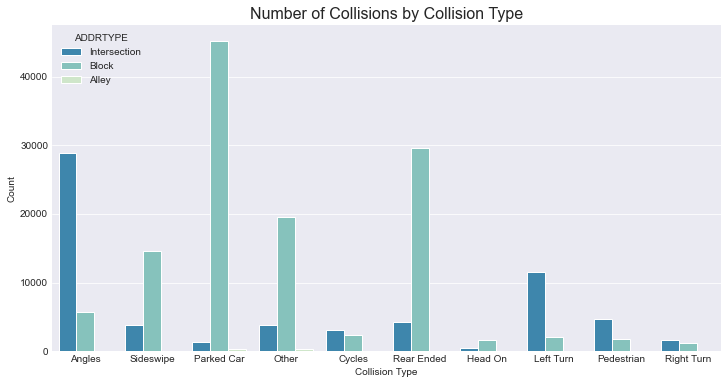

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))         

ax = sns.countplot(x=df['COLLISIONTYPE'], hue=df["ADDRTYPE"], data=df['COLLISIONTYPE'].value_counts(), ax = ax, palette="GnBu_r")
ax.set_xlabel("Collision Type")
ax.set_ylabel("Count")
ax.set_title("Number of Collisions by Collision Type", fontsize='16')


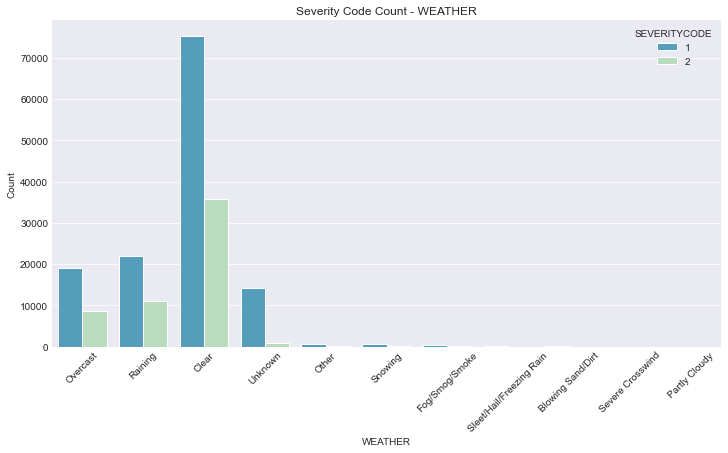

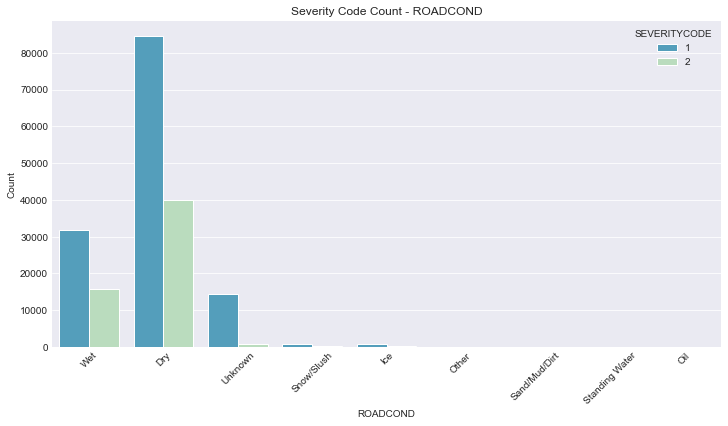

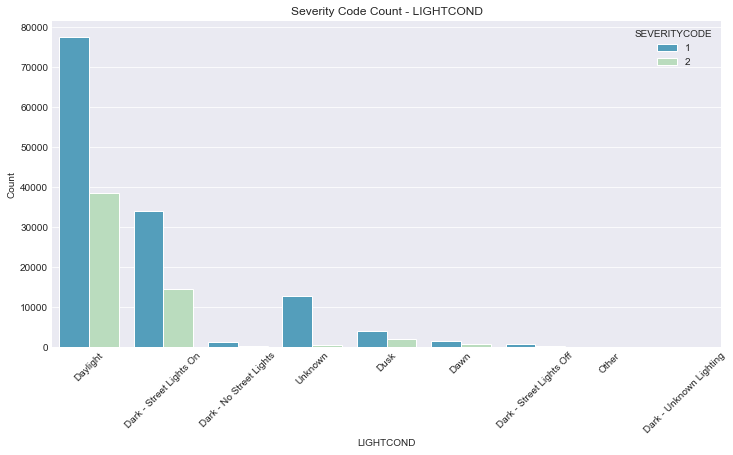

In [12]:
for attr in ['WEATHER', 'ROADCOND', 'LIGHTCOND'] :
    fig, ax = plt.subplots(figsize=(12,6))
    ax = sns.countplot(x=attr, hue='SEVERITYCODE', data=df, ax = ax, palette="GnBu_r")
    ax.set_xlabel(attr)
    ax.set_ylabel('Count')
    ax.set_title("Severity Code Count - %s" % attr)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()

### Data Cleaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   ADDRTYPE        192747 non-null  object 
 2   INTKEY          65070 non-null   float64
 3   COLLISIONTYPE   189769 non-null  object 
 4   INATTENTIONIND  29805 non-null   object 
 5   UNDERINFL       189789 non-null  object 
 6   WEATHER         189592 non-null  object 
 7   ROADCOND        189661 non-null  object 
 8   LIGHTCOND       189503 non-null  object 
 9   PEDROWNOTGRNT   4667 non-null    object 
 10  SPEEDING        9333 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 16.3+ MB


In [14]:
df.describe(include='all')

,SEVERITYCODE,ADDRTYPE,INTKEY,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
count,194673.000000,192747,65070.000000,189769,29805,189789,189592,189661,189503,4667,9333
unique,NaN,3,NaN,10,1,4,11,9,9,1,1
top,NaN,Block,NaN,Parked Car,Y,N,Clear,Dry,Daylight,Y,Y
freq,NaN,126926,NaN,47987,29805,100274,111135,124510,116137,4667,9333
mean,1.298901,NaN,37558.450576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.457778,NaN,51745.990273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,23807.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,28667.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,29973.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,NaN,33973.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Convert INTKEY to int and replace nan with 0

df['INTKEY'].replace(np.nan, 0.0, inplace=True)
df[['INTKEY']] = df[['INTKEY']].astype(int)

In [16]:
# Columns SPEEDING, PEDROWNOTGRNT, and INATTENTIONIND all contain NaN values instead of N. Convert Y to 1 and NaN to 0

df['SPEEDING'].replace('Y', 1, inplace=True)
df['SPEEDING'].replace(np.nan, 0, inplace=True)
df[['SPEEDING']] = df[['SPEEDING']].astype(int)

df['PEDROWNOTGRNT'].replace('Y', 1, inplace=True)
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace=True)
df[['PEDROWNOTGRNT']] = df[['PEDROWNOTGRNT']].astype(int)

df['INATTENTIONIND'].replace('Y', 1, inplace=True)
df['INATTENTIONIND'].replace(np.nan, 0, inplace=True)
df[['INATTENTIONIND']] = df[['INATTENTIONIND']].astype(int)

In [17]:
# Convert UNDERINFL to two values and drop nan

df['UNDERINFL'].replace('Y', 1, inplace=True)
df['UNDERINFL'].replace('N', 0, inplace=True)
df.dropna(subset=["UNDERINFL"], inplace=True)

df[['UNDERINFL']] = df[['UNDERINFL']].astype(int)
df['UNDERINFL'].value_counts()

0    180668
1      9121
Name: UNDERINFL, dtype: int64

In [18]:
# Drop records where WEATHER, ROADCOND, or LIGHTCOND is equal to 'Unknown' or 'Other'

for attr in ['WEATHER', 'ROADCOND', 'LIGHTCOND'] : 
    df[attr].replace('Other', np.nan, inplace=True)
    df[attr].replace('Unknown', np.nan, inplace=True)

# If value is 'Dark - Street Lights Off', convert to 'Dark - No Street Lights' as these two descriptions are functionally identical for our purposes

df['LIGHTCOND'].replace('Dark - Street Lights Off', 'Dark - No Street Lights', inplace=True)

# Drop 111 records where LIGHTCOND is equal to 'Dark - Unknown Lighting'

df['LIGHTCOND'].replace('Dark - Unknown Lighting', np.nan, inplace=True)

df.dropna(subset=['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=0, inplace=True)

for value in ['WEATHER', 'ROADCOND', 'LIGHTCOND'] : 
    print('VALUE COUNTS FOR %s' % value)
    print(df[value].isnull().value_counts(),'\n')
    print(df[value].value_counts(),'\n\n')


VALUE COUNTS FOR WEATHER
False    169949
Name: WEATHER, dtype: int64 

Clear                       108822
Raining                      32644
Overcast                     26922
Snowing                        825
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       107
Blowing Sand/Dirt               46
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64 


VALUE COUNTS FOR ROADCOND
False    169949
Name: ROADCOND, dtype: int64 

Dry               121487
Wet                46319
Ice                 1080
Snow/Slush           833
Standing Water       105
Sand/Mud/Dirt         65
Oil                   60
Name: ROADCOND, dtype: int64 


VALUE COUNTS FOR LIGHTCOND
False    169949
Name: LIGHTCOND, dtype: int64 

Daylight                   112618
Dark - Street Lights On     46748
Dusk                         5648
Dark - No Street Lights      2522
Dawn                         2413
Name: LIGHTCOND, dtype: int64 




In [19]:
# Drop approximately 700 records with no value for ADDRTYPE

df.dropna(subset=['ADDRTYPE'], axis=0, inplace=True)

In [20]:
# Use one-hot encoding for WEATHER, ROADCOND, and LIGHTCOND columns

df_encoded = df

for attr in ['WEATHER', 'ROADCOND', 'LIGHTCOND'] : 
    dummies = pd.get_dummies(df[attr])
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    df_encoded.drop(attr, axis=1, inplace=True)

print(df_encoded.columns)
df_encoded.head()

Index(['SEVERITYCODE', 'ADDRTYPE', 'INTKEY', 'COLLISIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'Blowing Sand/Dirt', 'Clear',
       'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice',
       'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights On', 'Dawn',
       'Daylight', 'Dusk'],
      dtype='object')


,SEVERITYCODE,ADDRTYPE,INTKEY,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,Blowing Sand/Dirt,Clear,...,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights On,Dawn,Daylight,Dusk
0,2,Intersection,37475,Angles,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,Block,0,Sideswipe,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,Block,0,Parked Car,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,Block,0,Other,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,2,Intersection,34387,Angles,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [21]:
df = df_encoded
df.shape

(169239, 29)

There are now just under 170 000 records remaining.

In [22]:
print('Inattentive driver: %.2f percent of records' % (df['INATTENTIONIND'].mean()*100))
print('Speeding driver: %.2f percent of records' % (df['SPEEDING'].mean()*100))
print('Driver under the influence: %.2f percent of records' % (df['UNDERINFL'].mean()*100))


Inattentive driver: 16.83 percent of records
Speeding driver: 5.34 percent of records
Driver under the influence: 5.29 percent of records


### Data Balancing


The dataset is currently unbalanced in terms of the class variable we are trying to predict. There are approximately twice as many records with SEVERITYCODE = 1 than SEVERITYCODE = 2 in our cleaned dataset. We will use an undersampling technique to balance the dataset

In [23]:
sc_counts = pd.DataFrame(df['SEVERITYCODE'].value_counts())
sc_counts

,SEVERITYCODE
1,113700
2,55539


Text(0.5, 1.0, 'Unbalanced Class Value Counts')

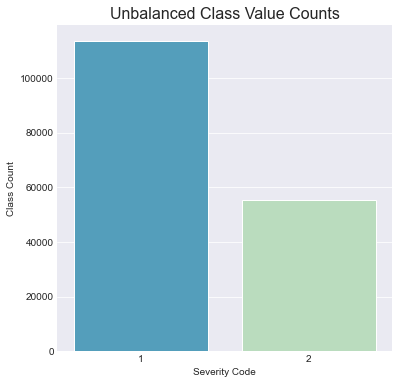

In [24]:

fig, ax = plt.subplots(figsize=(6, 6))         
ax = sns.countplot(x=df['SEVERITYCODE'], data=df, ax = ax, palette="GnBu_r")
ax.set_xlabel("Severity Code")
ax.set_ylabel("Class Count")
ax.set_title("Unbalanced Class Value Counts", fontsize='16')


In [25]:
shuffled_df = df.sample(frac=1, random_state=4)
df_sc2 = shuffled_df[df['SEVERITYCODE'] == 2]
df_sc2['SEVERITYCODE'].value_counts()

2    55539
Name: SEVERITYCODE, dtype: int64

In [26]:
df_sc1 = shuffled_df[shuffled_df['SEVERITYCODE'] == 1].sample(n=55539, random_state=1)
df_sc1['SEVERITYCODE'].value_counts()

1    55539
Name: SEVERITYCODE, dtype: int64

In [27]:
df_balanced = pd.concat([df_sc1, df_sc2])
df_balanced = df_balanced.sample(frac=1, random_state=4)
df_balanced.describe()

,SEVERITYCODE,INTKEY,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,...,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights On,Dawn,Daylight,Dusk
count,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,...,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000,111078.000000
mean,1.500000,14758.259268,0.172239,0.055583,0.038495,0.055132,0.000243,0.640415,0.003223,0.156998,...,0.000360,0.000387,0.004447,0.000648,0.273366,0.014188,0.269837,0.014143,0.668800,0.033031
std,0.500002,37240.923347,0.377590,0.229115,0.192390,0.228240,0.015589,0.479881,0.056680,0.363800,...,0.018973,0.019672,0.066540,0.025451,0.445689,0.118267,0.443877,0.118082,0.470647,0.178718
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,29587.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2.000000,719862.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Balanced Class Value Counts')

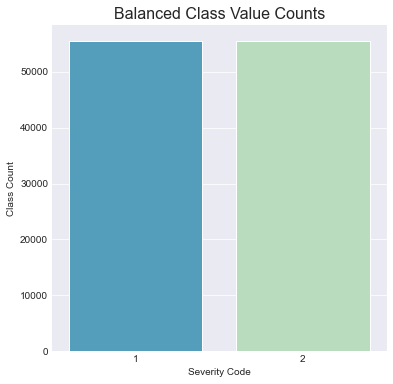

In [28]:

fig, ax = plt.subplots(figsize=(6, 6))         
ax = sns.countplot(x=df_balanced['SEVERITYCODE'], data=df, ax = ax, palette="GnBu_r")
ax.set_xlabel("Severity Code")
ax.set_ylabel("Class Count")
ax.set_title("Balanced Class Value Counts", fontsize='16')


The dataframe is now well balanced and is ready for the model

## Modeling

### Data Selection

We will start by defining our dependent and independent variables. X will include all of the indicator columns we have prepared and Y will be SEVERITYCODE.

In [29]:
df_balanced.columns

Index(['SEVERITYCODE', 'ADDRTYPE', 'INTKEY', 'COLLISIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'Blowing Sand/Dirt', 'Clear',
       'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice',
       'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights On', 'Dawn',
       'Daylight', 'Dusk'],
      dtype='object')

In [30]:
X = np.asarray(df_balanced[['INATTENTIONIND',
       'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'Blowing Sand/Dirt', 'Clear',
       'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice',
       'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights On', 'Dawn',
       'Daylight', 'Dusk']])

y = np.asarray(df_balanced['SEVERITYCODE'])

The next step is to split our dataset into a training set and testing set. This will improve the out-of-sample accuracy of our model. 20% of the records will be reserved for the test set.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Build the Model



The most useful type of model for our objective will be a Logistic Regression model. We will tune our Logistic Regressoion model on various values of the C parameter and various solvers.

In [32]:
from sklearn.linear_model import LogisticRegression

# Define and fit the model

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

# Use the model for predictions

yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print(yhat[0:5])
print(yhat_prob[0:5])


[1 1 1 1 2]
[[0.5016465  0.4983535 ]
 [0.52033823 0.47966177]
 [0.52033823 0.47966177]
 [0.52033823 0.47966177]
 [0.47007701 0.52992299]]


### Model Evaluation

We will use various metrics to evaluate and tune the Logistic Regression model. These include F1-Score, Jaccard Score, and LogLoss metrics.

In [33]:
from sklearn.metrics import jaccard_score, classification_report, log_loss

# Baseline metrics

print(classification_report(y_test, yhat))
print("Jaccard Score : " , jaccard_score(y_test, yhat), '\n')
print("LogLoss : " , log_loss(y_test, yhat_prob) , '\n')


              precision    recall  f1-score   support

           1       0.53      0.80      0.64     11083
           2       0.60      0.31      0.41     11133

    accuracy                           0.55     22216
   macro avg       0.57      0.55      0.52     22216
weighted avg       0.57      0.55      0.52     22216

Jaccard Score :  0.46915091828586636 

LogLoss :  0.6709842324917912 



To tune the model, we will first try different solvers to identify which one produces the maximum accuracy and then different values for regularization strength.

In [34]:
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']
Cs = [0.01, 0.05, 0.1, 0.5, 1]


def build_model (solver, C) : 
    
    # Define and fit the model

    LR = LogisticRegression(C=C, solver=solver).fit(X_train, y_train)

    # Use the model for predictions

    yhat = LR.predict(X_test)
    yhat_prob = LR.predict_proba(X_test)

    # Print Results

    print("Jaccard Score : %.4f \n" % jaccard_score(y_test, yhat))
    print("LogLoss : %.4f \n" % log_loss(y_test, yhat_prob))

    return LR


for solver in solvers :

    print("\n\nSOLVER = %s \n" % solver )

    for C in Cs :

        print("C = %s \n" % C )

        build_model(solver, C)




SOLVER = newton-cg 

C = 0.01 

Jaccard Score : 0.4694 

LogLoss : 0.6710 

C = 0.05 

Jaccard Score : 0.4693 

LogLoss : 0.6700 

C = 0.1 

Jaccard Score : 0.4693 

LogLoss : 0.6699 

C = 0.5 

Jaccard Score : 0.4693 

LogLoss : 0.6699 

C = 1 

Jaccard Score : 0.4693 

LogLoss : 0.6699 



SOLVER = lbfgs 

C = 0.01 

Jaccard Score : 0.4694 

LogLoss : 0.6710 

C = 0.05 

Jaccard Score : 0.4693 

LogLoss : 0.6700 

C = 0.1 

Jaccard Score : 0.4693 

LogLoss : 0.6699 

C = 0.5 

Jaccard Score : 0.4693 

LogLoss : 0.6699 

C = 1 

Jaccard Score : 0.4693 

LogLoss : 0.6699 



SOLVER = sag 

C = 0.01 

Jaccard Score : 0.4694 

LogLoss : 0.6710 

C = 0.05 

Jaccard Score : 0.4693 

LogLoss : 0.6700 

C = 0.1 

Jaccard Score : 0.4693 

LogLoss : 0.6699 

C = 0.5 

Jaccard Score : 0.4693 

LogLoss : 0.6699 

C = 1 

Jaccard Score : 0.4693 

LogLoss : 0.6699 



SOLVER = saga 

C = 0.01 

Jaccard Score : 0.4694 

LogLoss : 0.6710 

C = 0.05 

Jaccard Score : 0.4693 

LogLoss : 0.6700 

C =

While all the solvers performed similary, we can slightly improve the jaccard score of our baseline model by selecting the lbfgs model.

In [35]:
LR_optimized = build_model('lbfgs', 0.01)
LR_optimized

Jaccard Score : 0.4694 

LogLoss : 0.6710 



LogisticRegression(C=0.01)

From this classification report, we can see that the model is more accurate at predicting records with severity of 1 and not that great at labelling severity code 2. The weighted average f1-score indicates that the average accuracy of our model is approximately 0.52. From this we may conclude that a number of the predictor variables that we defined are likely inconsequential in predicting the severitycode.

In [36]:
yhat = LR_optimized.predict(X_test)

print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.53      0.80      0.64     11083
           2       0.60      0.31      0.41     11133

    accuracy                           0.55     22216
   macro avg       0.57      0.55      0.52     22216
weighted avg       0.57      0.55      0.52     22216



## Discussion

Based on the analysis in the report, intersection collisions are far more likely to be defined as being a result of angles, left turns, or pedestrians whereas ‘block’ collisions are more likely to involve a parked car or rear ending. The analysis indicates that the type of collision is not very correlated with the severity of an accident. 

One key area where correlation does exist is between severity code 2 (persons injured) and the indicator flag, PEDROWNOTGRNT (Pedestrian Right of Way Not Granted). This makes logical sense as if a pedestrian is not given their right of way, they are more likely to be involved in the collision.

One interesting difference is that more collisions occur at Dusk than at Dawn. However, most accidents in our dataset occurred in Dry Road Conditions and Daylight. This model doesn’t take into account the various distributions of weather. An opportunity to improve the model is to normalize these values according to the actual average distribution of road, light, and weather conditions. 

From a mitigation perspective, it would be unwise to apply resources uniformly across the city in order to address a specific issue. Mitigation efforts should be concentrated where they would have the greatest impact.  It would thus be constructive to identify which intersections are the most dangerous. This way, the City of Seattle can optimally allocate their resources and mitigation tactics towards addressing key factors in key intersections.



## Conclusion

A significant number of factors may determine whether a collision occurs and whether or not property is damaged or persons are injured. These include human behaviours such as distracted driving or speeding, and environmental factors such as weather, road, and light conditions. 

The objective of this report was to identify if any such factors are accurately able to predict the severity of an accident. Severity was classified as a 1 if only property was damaged or as a 2 if injuries occurred as well. After preparing, cleaning, and balancing the dataset, a logistic regression model was built to predict the severity code. The dataset was split into 80% for training and 20% for training, in order to improve the out of sample accuracy. 

The model itself was able to somewhat accurately predict the class value of 1 but was not very effective at accurately predicting the class value of 2. The results of the analysis determined that the identified factors are not significant indicators of the severity code measurement.